# Analise_de_Dados

Dados(Não Reais) de 2019 de uma empresa de prestação de serviços(Não Real). 

- CadastroFuncionarios
- CadastroClientes
- BaseServiçosPrestados


In [1]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

funcionarios_df = pd.read_csv('CadastroFuncionarios.csv',sep=';', decimal=',') 

clientes_df = pd.read_csv(r'CadastroClientes.csv',sep=';', decimal=',')

servicos_df = pd.read_excel(r'BaseServiçosPrestados.xlsx')

funcionarios_df = funcionarios_df.drop(['Estado Civil','Cargo'], axis=1)



In [2]:

funcionarios_df.sample(5)


,ID Funcionário,Nome Completo,Salario Base,Impostos,Beneficios,VT,VR,Area
90,117,Flávio Jacques Gamboa Fernandez de Oliveira Netto,17709,8854.5,3541.8,220,614.88,Financeiro
22,27,Carolina Monteiro,1865,932.5,373.0,198,635.04,Financeiro
103,133,Adrielle Sá Rodrigues,11424,5712.0,2284.8,286,540.96,Logística
91,118,Lucas Martins,20424,10212.0,4084.8,308,708.96,Operações
84,109,Bruna Calmon,15076,7538.0,3015.2,242,624.96,Logística


In [3]:

clientes_df.sample(5)


,ID Cliente,Cliente,Valor Contrato Mensal
40,41,Fernando Walter,900
129,130,Brigagao Ferreira,2475
250,251,Ávila Gaiotto,4410
33,34,Hugo Grippe,1890
171,172,Belluci Rocha,2385


In [4]:

servicos_df.sample(5)


,Codigo do Servico,ID Funcionário,ID Cliente,Tempo Total de Contrato (Meses),Unnamed: 4,Unnamed: 5
31,OS0032,45,37,14,NaN,NaN
167,OS0168,118,228,12,NaN,NaN
14,OS0015,121,16,8,NaN,NaN
229,OS0230,14,310,12,NaN,NaN
127,OS0128,67,175,6,NaN,NaN


### 1 - Folha Salarial 


In [5]:

funcionarios_df['Total_Folha'] = funcionarios_df.loc[:,'Salario Base':'VR'].sum(axis=1)
total_folha_pagamento = funcionarios_df['Total_Folha'].sum(axis=0)
print('\033[1;34mO Total da Folha de Pagamento é: \033[1;32mR$ {:,.2f}\033[m '.format(total_folha_pagamento))


O Total da Folha de Pagamento é: R$ 2,717,493.22 


### 2 - Faturamento da Empresa

In [6]:

f_t = servicos_df[['ID Cliente','Tempo Total de Contrato (Meses)']].merge(clientes_df[['ID Cliente','Valor Contrato Mensal']])
f_t['Faturamento Total'] = f_t['Tempo Total de Contrato (Meses)'] * f_t['Valor Contrato Mensal']
print('\033[1;34mO Faturamento da Empresa foi: \033[1;32mR$ {:,.2f}\033[m'.format(sum(f_t['Faturamento Total'])))


O Faturamento da Empresa foi: R$ 5,519,160.00


### 3 - Percentual de Funcionarios Que Fecharam Contrato

In [7]:

a = len(servicos_df['ID Funcionário'].unique())
a_t = len(funcionarios_df['ID Funcionário'])
print('\033[1;34mPercentual de Funcionarios que fecharam contrato: \033[1;32m{:.2%}\033[m'.format(a/a_t))


Percentual de Funcionarios que fecharam contrato: 86.84%


### 4 - Qtde Contratos por Área

In [8]:

contratos_area_df = servicos_df.merge(funcionarios_df[['ID Funcionário','Area']], on='ID Funcionário')

contratos_area_qtde = contratos_area_df['Area']

contratos_area_qtde.value_counts()


Administrativo    63
Operações         48
Comercial         44
Financeiro        42
Logística         40
Name: Area, dtype: int64

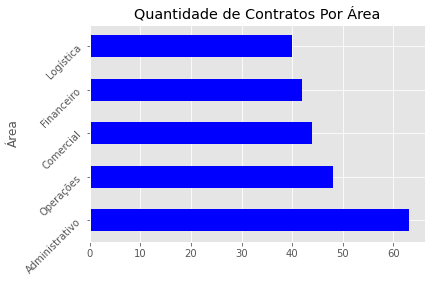

In [9]:
plt.style.use('ggplot')

contratos_area_qtde = contratos_area_df['Area'].value_counts()

contratos_area_qtde.plot(kind='barh', 
                           xlabel= 'Área', 
                           ylabel = 'Tempo Todal de Contrado em Meses', 
                           title = 'Quantidade de Contratos Por Área',
                           color = '#0000FF'
                          ) 

plt.yticks(rotation=45);


### 5 - Funcioários por Área

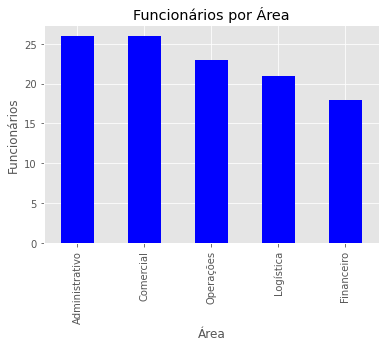

In [10]:

funcionarios_por_area = funcionarios_df['Area'].value_counts()

funcionarios_por_area.plot(kind='bar', 
                           xlabel= 'Área', 
                           ylabel = 'Funcionários', 
                           title = 'Funcionários por Área',
                           color = '#0000ff'
                          ); 


### 6 - Ticket Médio Mensal

In [11]:

ticket = clientes_df['Valor Contrato Mensal'].mean()
print('\033[1;34mTicket Médio Mensal = \033[1;32mR$ {:,.2f}\033[m'.format(ticket))            


Ticket Médio Mensal = R$ 2,502.56
